# Learning

The shallowest network is one that has no hidden layers at all. But this type of network can only solve one type of problem: those that are linearly separable. This notebook explores learning linearly and non-lineraly separable datasets.

## Linearly Separable

In [1]:
import conx as cx
import random

Using Theano backend.
Conx, version 3.6.0


First, let's construct a fake linearly-separable dataset.

In [2]:
count = 500

positives = [(i/count, i/(count * 2) + random.random()/6) for i in range(count)]
negatives = [(i/count, 0.3 + i/(count * 2) + random.random()/6) for i in range(count)]

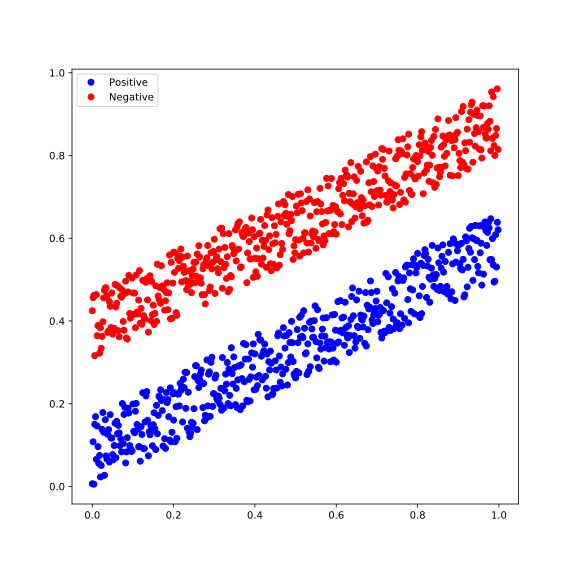

In [3]:
cx.scatter([
         ["Positive", positives], 
         ["Negative", negatives],
        ], 
    height=8.0, 
    width=8.0, 
    symbols={"Positive": "bo", "Negative": "ro"})

In [4]:
ds = cx.Dataset()

In [5]:
ds.load([(p, [ 1.0], "Positive") for p in positives] +
        [(n, [ 0.0], "Negative") for n in negatives])

In [6]:
ds.shuffle()

In [7]:
ds.split(.1)

In [8]:
ds.summary()

_________________________________________________________________
Unnamed Dataset:
Patterns    Shape                 Range                         
inputs      (2,)                  (0.0, 0.998)                  
targets     (1,)                  (0.0, 1.0)                    
Total patterns: 1000
   Training patterns: 900
   Testing patterns: 100
_________________________________________________________________


In [9]:
net = cx.Network("Linearly Separable", 2, 1, activation="sigmoid")
net.compile(error="mae", optimizer="adam") 

In [10]:
net.set_dataset(ds)

In [11]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=0.5, continuous_update=False, description='Zoom', layout=Layout(width='65%'), max=1.0, style=SliderStyle(description_width='initial')), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=1.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=1, options=('input', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPIBAY8AAK8AANAAAAIC8wAAbwAAsAAAkAAA0Pr2+vPn8wAAVkdH/7a2///X1yYm/2Zm/3h4/5aW/9fX//8VFf8mJv84OP9WVv9nZ/+Ghv+YmP+2thYW/zU1/1hY/4aG/6Wl/8jI//9GRv92dv+mpv/FxX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

<IPython.core.display.Javascript object>

In [12]:
net.test(tolerance=0.4)

Testing validation dataset with tolerance 0.4...
Total count: 900
      correct: 246
      incorrect: 654
Total percentage correct: 0.2733333333333333


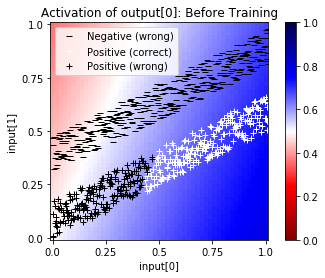

In [13]:
symbols = {
    "Positive (correct)": "w+",
    "Positive (wrong)": "k+",
    "Negative (correct)": "w_",
    "Negative (wrong)": "k_",
}

net.plot_activation_map(scatter=net.test(tolerance=0.4, interactive=False), 
                        symbols=symbols, title="Before Training")

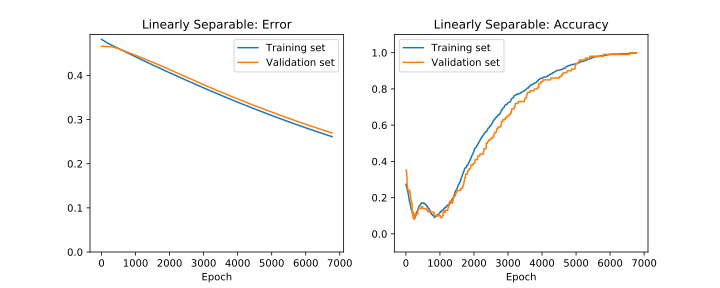

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
# 6775 |   0.26114 |   1.00000 |   0.26946 |   1.00000 
Saving network... Saved!


In [14]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.train(epochs=10000, accuracy=1.0, report_rate=50, 
             tolerance=0.4, batch_size=len(net.dataset.train_inputs), 
             plot=True, record=100, save=True)

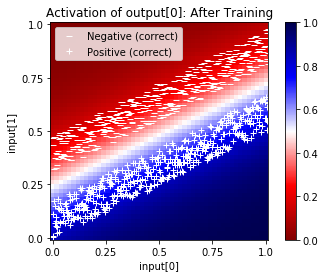

In [15]:
net.plot_activation_map(scatter=net.test(tolerance=0.4, interactive=False), 
                        symbols=symbols, title="After Training")

In [16]:
net.get_weights("output")

[[[3.3727526664733887], [-7.073390007019043]], [1.7067580223083496]]

In [17]:
from conx.activations import sigmoid

def output(x, y):
    wts = net.get_weights("output")
    return sigmoid(x * wts[0][1][0] + y * wts[0][0][0] + wts[1][0])

def ascii(f):
    return "%4.1f" % f

In [18]:
for y in cx.frange(0, 1.1, .1):
    for x in cx.frange(1.0, 0.1, -0.1):
        print(ascii(output(x, y)), end=" ")
    print()

 0.0  0.0  0.0  0.0  0.1  0.1  0.2  0.4  0.6 
 0.0  0.0  0.0  0.1  0.1  0.2  0.3  0.5  0.7 
 0.0  0.0  0.0  0.1  0.1  0.2  0.4  0.6  0.7 
 0.0  0.0  0.1  0.1  0.2  0.3  0.5  0.6  0.8 
 0.0  0.0  0.1  0.1  0.2  0.4  0.6  0.7  0.8 
 0.0  0.0  0.1  0.2  0.3  0.5  0.6  0.8  0.9 
 0.0  0.1  0.1  0.2  0.4  0.5  0.7  0.8  0.9 
 0.0  0.1  0.2  0.3  0.5  0.6  0.8  0.9  0.9 
 0.1  0.1  0.2  0.4  0.5  0.7  0.8  0.9  1.0 
 0.1  0.2  0.3  0.4  0.6  0.8  0.9  0.9  1.0 
 0.1  0.2  0.4  0.5  0.7  0.8  0.9  1.0  1.0 


SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='Linearly Separable Playback:', layout=Layout(width='100%'), max=68, style=SliderStyle(description_width='initial')), Label(value='of 69', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

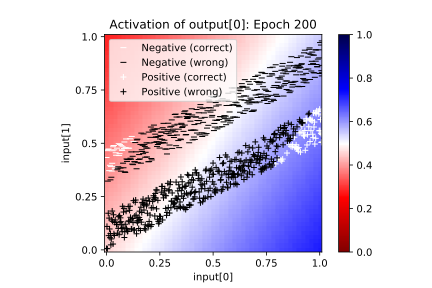

In [23]:
net.playback(lambda net, epoch: net.plot_activation_map(title="Epoch %s" % epoch, 
                                                        scatter=net.test(tolerance=0.4, interactive=False), 
                                                        symbols=symbols, 
                                                        format="svg"))

In [24]:
net.set_weights_from_history(-1)

In [27]:
net.movie(lambda net, epoch: net.plot_activation_map(title="Epoch %s" % epoch, 
                                                     scatter=net.test(tolerance=0.4, interactive=False), 
                                                     symbols=symbols, 
                                                     format="image"))

## Non-Linearly Separable

In [28]:
import math

In [29]:
def distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [30]:
negatives = []
while len(negatives) < 500:
    x = random.random()
    y = random.random()
    d = distance(x, y, 0.5, 0.5)
    if d > 0.375 and d < 0.5:
        negatives.append([x, y])
positives = []
while len(positives) < 500:
    x = random.random()
    y = random.random()
    d = distance(x, y, 0.5, 0.5)
    if d < 0.25:
        positives.append([x, y])

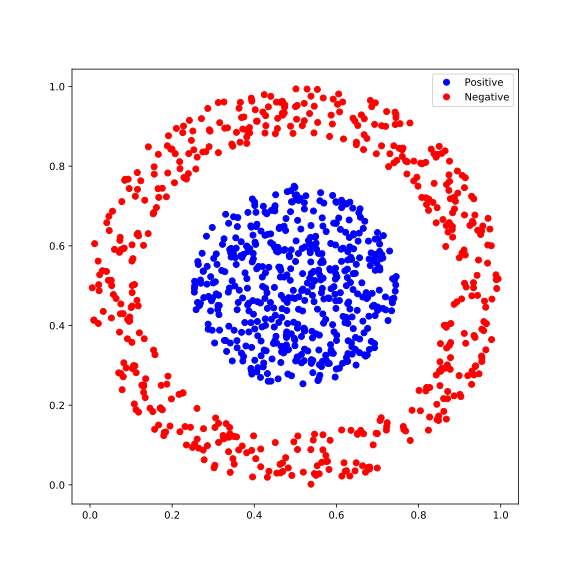

In [31]:
cx.scatter([
         ["Positive", positives], 
         ["Negative", negatives],
        ], 
    height=8.0, 
    width=8.0, 
    symbols={"Positive": "bo", "Negative": "ro"})

In [32]:
net = cx.Network("Non-Linearly Separable", 2, 5, 1, activation="sigmoid")
net.compile(error="mae", optimizer="adam") 

<IPython.core.display.Javascript object>


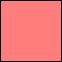
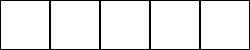
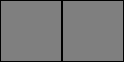

In [33]:
net.picture()

In [34]:
ds = cx.Dataset()

In [35]:
ds.load([(p, [ 1.0], "Positive") for p in positives] +
        [(n, [ 0.0], "Negative") for n in negatives])

In [36]:
ds.shuffle()

In [37]:
ds.split(.1)

In [38]:
net.set_dataset(ds)

In [39]:
net.test(tolerance=0.4)

Testing validation dataset with tolerance 0.4...
Total count: 900
      correct: 449
      incorrect: 451
Total percentage correct: 0.4988888888888889


In [40]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, options=('Test', 'Train'), rows=1, value='Train'), FloatSlider(value=0.5, continuous_update=False, description='Zoom', layout=Layout(width='65%'), max=1.0, style=SliderStyle(description_width='initial')), IntText(value=150, description='Horizontal space between banks:', style=DescriptionStyle(description_width='initial')), IntText(value=30, description='Vertical space between layers:', style=DescriptionStyle(description_width='initial')), HBox(children=(Checkbox(value=False, description='Show Targets', style=DescriptionStyle(description_width='initial')), Checkbox(value=False, description='Errors', style=DescriptionStyle(description_width='initial')))), Select(description='Features:', options=('',), rows=1, value=''), IntText(value=3, description='Feature columns:', style=DescriptionStyle(description_width='initial')), FloatText(value=1.0, description='Feature scale:', style=DescriptionStyle(description_width='initial'))), layout=Layout(width='100%')), VBox(children=(Select(description='Layer:', index=2, options=('input', 'hidden', 'output'), rows=1, value='output'), Checkbox(value=True, description='Visible'), Select(description='Colormap:', options=('', 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Vega10', 'Vega10_r', 'Vega20', 'Vega20_r', 'Vega20b', 'Vega20b_r', 'Vega20c', 'Vega20c_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spectral', 'spectral_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'viridis', 'viridis_r', 'winter', 'winter_r'), rows=1, value=''), HTML(value='<img src="data:image/gif;base64,R0lGODdhLAEZAIcAAPIBAY8AAK8AANAAAAIC8wAAbwAAsAAAkAAA0Pr2+vPn8wAAVkdH/7a2///X1yYm/2Zm/3h4/5aW/9fX//8VFf8mJv84OP9WVv9nZ/+Ghv+YmP+2thYW/zU1/1hY/4aG/6Wl/8jI//9GRv92dv+mpv/FxX8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

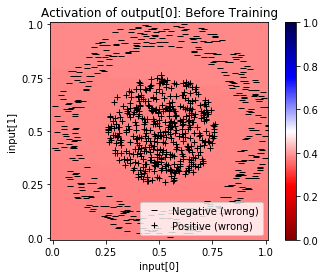

In [41]:
net.plot_activation_map(scatter=net.test(interactive=False), symbols=symbols, title="Before Training")

You may want to either `net.reset()` or `net.retrain()` if the following cell doesn't complete with 100% accuracy. Calling `net.reset()` may be needed if the network has landed in a local maxima; `net.retrain()` may be necessary if the network just needs additional training.

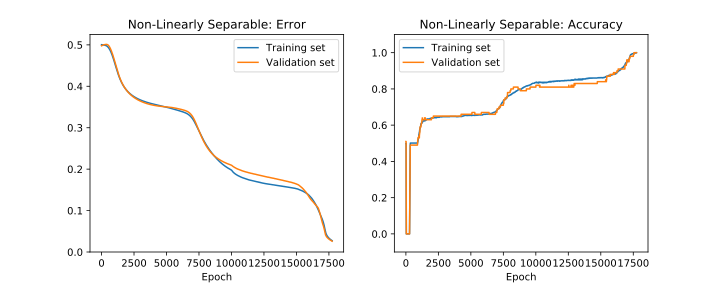

       |  Training |  Training |  Validate |  Validate 
Epochs |     Error |  Accuracy |     Error |  Accuracy 
------ | --------- | --------- | --------- | --------- 
#17746 |   0.02727 |   1.00000 |   0.02608 |   1.00000 
Saving network... Saved!


In [44]:
if net.saved():
    net.load()
    net.plot_results()
else:
    net.train(epochs=10000, accuracy=1.0, report_rate=50, 
              tolerance=0.4, batch_size=256, 
              plot=True, record=100, save=True)

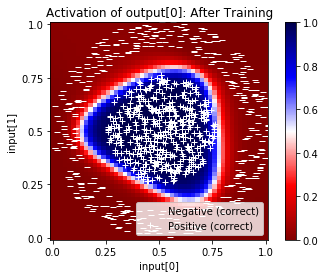

In [45]:
net.plot_activation_map(scatter=net.test(interactive=False), symbols=symbols, title="After Training")

In [46]:
net.get_weights("hidden")

[[[-6.404449939727783,
   7.37056827545166,
   -12.947518348693848,
   7.471460819244385,
   -7.8771443367004395],
  [-11.006869316101074,
   11.604531288146973,
   -1.4833985567092896,
   -14.498926162719727,
   -12.94011116027832]],
 [5.999775409698486,
  9.866920471191406,
  10.296037673950195,
  7.081101894378662,
  7.790738582611084]]

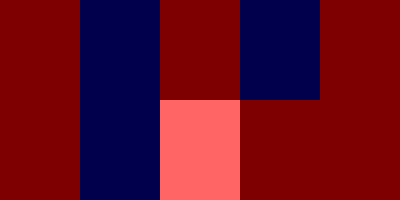

In [47]:
net.get_weights_as_image("hidden").resize((400, 200))

In [48]:
net.get_weights("output")

[[[-26.79941177368164],
  [-7.317086696624756],
  [14.472185134887695],
  [12.987898826599121],
  [9.788432121276855]],
 [-10.76565933227539]]

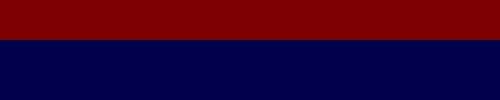

In [49]:
net.get_weights_as_image("output").resize((500, 100))

In [50]:
for y in cx.frange(0, 1.1, .1):
    for x in cx.frange(1.0, 0.1, -0.1):
        print(ascii(net.propagate([x, y])[0]), end=" ")
    print()

 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.1  0.6  0.7  0.3  0.1  0.0  0.0 
 0.0  0.0  0.3  0.9  1.0  1.0  0.8  0.3  0.0 
 0.0  0.0  0.3  1.0  1.0  1.0  1.0  1.0  0.6 
 0.0  0.0  0.3  1.0  1.0  1.0  1.0  1.0  0.9 
 0.0  0.0  0.2  0.9  1.0  1.0  1.0  1.0  0.7 
 0.0  0.0  0.1  0.8  1.0  1.0  0.9  0.5  0.1 
 0.0  0.0  0.0  0.1  0.4  0.4  0.2  0.1  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 


SequenceViewer(children=(VBox(children=(HBox(children=(IntSlider(value=0, continuous_update=False, description='Non-Linearly Separable Playback:', layout=Layout(width='100%'), max=178, style=SliderStyle(description_width='initial')), Label(value='of 179', layout=Layout(width='100px'))), layout=Layout(height='40px')), HBox(children=(Button(icon='fast-backward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='backward', layout=Layout(width='100%'), style=ButtonStyle()), IntText(value=0, layout=Layout(width='100%')), Button(icon='forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(icon='fast-forward', layout=Layout(width='100%'), style=ButtonStyle()), Button(description='Play', icon='play', layout=Layout(width='100%'), style=ButtonStyle())), layout=Layout(height='50px', width='100%'))), layout=Layout(width='100%')), Output()))

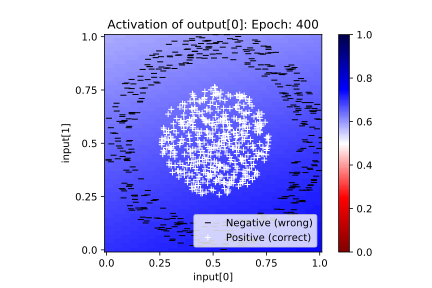

In [51]:
net.playback(lambda net, epoch: net.plot_activation_map(title="Epoch: %s" % epoch, 
                                                        scatter=net.test(interactive=False),
                                                        symbols=symbols,
                                                        format="svg"))

In [52]:
net.movie(lambda net, epoch: net.plot_activation_map(title="Epoch %s" % epoch, 
                                                     scatter=net.test(tolerance=0.4, interactive=False), 
                                                     symbols=symbols, 
                                                     format="image"))